In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [13]:
def load_data_from_csv(file_path):
    """
    Load Open Interest data from CSV file.
    :param file_path: Path to the CSV file.
    :return: DataFrame containing Open Interest data.
    """
    return pd.read_csv(file_path, skiprows=1)

In [14]:
def parse_data_from_csv(file_path):
    """
    Parse Open Interest data from CSV file.
    :param file_path: Path to the CSV file.
    :return: Dictionary containing FII, PRO, and Client positions.
    """
    df = load_data_from_csv(file_path)
    df.head()
    columns_mapping = {
    "Client Type": "Participant Type",
    "Future Index Long": "LongFut", "Future Index Short": "ShortFut",
    "Option Index Call Long": "LongCall", "Option Index Call Short": "ShortCall",
    "Option Index Put Long": "LongPut", "Option Index Put Short": "ShortPut"
    }
    df = df.rename(columns=columns_mapping)
    df.columns = df.columns.str.replace(r"\s+", " ", regex=True) 
    df.columns = df.columns.str.strip()  # Removes unwanted spaces & tabs
    df.columns = [re.sub(r'[^A-Za-z0-9 ]+', '', col) for col in df.columns]
    df["FutRatio"] = df["LongFut"] / df["ShortFut"]
    return df

In [15]:
def plot_futures_graph(participant_type, data, type):
    """
    Plot the Open Interest of Index Futures for a given client type.
    :param client_type: Client type (FII, PRO, or Client).
    :param data: Dictionary containing FII, PRO, and Client positions.
    """
    long_fut = data.loc[data["Participant Type"] == participant_type, "LongFut"].iloc[0]
    short_fut = data.loc[data["Participant Type"] == participant_type, "ShortFut"].iloc[0]
    categories = ["Long Futures", "Short Futures"]  # Labels for bars
    values = [long_fut, short_fut]
    
    plt.figure(figsize=(6, 4))  # Set figure size

    plt.bar(categories, values, color=['blue', 'red'])
    plt.ylabel("Value")
    plt.title(f"{participant_type} Long and Short Futures - {type}")
    # Show plot
    plt.show()

In [16]:
def plot_fut_long_to_short_ratio(df_open_interest, type):
    # Plotting the ratio
    plt.figure(figsize=(10, 6))
    # Define colors based on the ratio
    colors = ['blue' if ratio > 1 else 'red' if ratio < 1 else 'grey' for ratio in df_open_interest["FutRatio"]]
    for i, ratio in enumerate(df_open_interest["FutRatio"]):
        plt.text(i, ratio, f'{ratio:.2f}', ha='center', va='bottom')
    plt.bar(df_open_interest["Participant Type"], df_open_interest["FutRatio"], color=colors)
    plt.xlabel('Participant Type')
    plt.ylabel('Ratio of Long Futures to Short Futures')
    plt.title(f'Comparison of Long to Short Futures Ratio for Participants - {type}')
    plt.show()

In [17]:

def plot_total_contracts(data, type):
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]  
    
    # Extract total long and short contracts (excluding 'TOTAL' row)
    total_long = data["Total Long Contracts"][:-1]  
    total_short = data["Total Short Contracts"][:-1]  
    
    indices = np.arange(len(participant_types))  # X-axis positions
    width = 0.4  # Width of bars
    
    plt.figure(figsize=(10, 5))  # Set figure size
    
    # Plot bars side by side
    plt.bar(indices - width/2, total_long, width, color='blue', label='Total Long Contracts\t')
    plt.bar(indices + width/2, total_short, width, color='red', label='Total Short Contracts')
    
    # Labels and title
    plt.xlabel("Participant Type")
    plt.ylabel("Number of Contracts")
    plt.title(f"Total Long vs Short Contracts by Participant Type - {type}")
    plt.xticks(indices, participant_types, rotation=45)  # Rotate x-axis labels for clarity
    plt.legend()
    
    # Show the plot
    plt.show()

In [18]:
def plot_total_long_short_contract_ratio(data,type):
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]  
    # Extract total long and short contracts (excluding 'TOTAL' row)
    total_long = data["Total Long Contracts"][:-1]  
    total_short = data["Total Short Contracts"][:-1]  
    long_short_ratio = total_long / total_short  # Calculate the ratio
    indices = np.arange(len(participant_types))  # X-axis positions
    colors = ['blue' if ratio > 1 else 'red' if ratio < 1 else 'grey' for ratio in long_short_ratio]
    plt.figure(figsize=(10, 5))  # Set figure size
    for i, ratio in enumerate(long_short_ratio):
        plt.text(i, ratio, f'{ratio:.2f}', ha='center', va='bottom')
    plt.bar(indices, long_short_ratio, color=colors)
    plt.xlabel('Participant Type')
    plt.ylabel('Long/Short Contracts Ratio')
    plt.title(f'Long to Short Contracts Ratio by Participant Type - {type}')
    plt.xticks(indices, participant_types, rotation=45)  # Rotate x-axis labels for clarity
    plt.axhline(1, color='black', linewidth=0.8)  # Add horizontal line at 1
    plt.show()
    

In [19]:
def plot_net_options(data, type):
    # (call long + put short)-(call short + put long)
    # Compute Net Options for each participant
    net_options = (data["LongCall"] + data["ShortPut"]) - (data["ShortCall"] + data["LongPut"])
    
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]
    net_options = net_options[:-1]  # Exclude 'TOTAL' row
    
    indices = np.arange(len(participant_types))  # X-axis positions
    
    plt.figure(figsize=(10, 5))  # Set figure size
    
    # Define colors based on net options value
    colors = ['green' if value > 0 else 'red' for value in net_options]
    
    # Plot bar chart
    plt.bar(participant_types, net_options, color=colors, label="Net Options")
    
    # Labels and title
    plt.xlabel("Participant Type")
    plt.ylabel("Net Options Value")
    plt.title(f"Net Options Position by Participant Type - {type}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.axhline(0, color='black', linewidth=0.8)  # Add horizontal line at 0
    plt.legend()
    
    # Show the plot
    plt.show()

In [20]:
def plot_net_options_long_to_short_ratio(data, type):
    # (call long + put short)-(call short + put long)
    # Compute Net Options for each participant
    net_options_ratio = (data["LongCall"] + data["ShortPut"]) / (data["ShortCall"] + data["LongPut"])
    
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]
    net_options_ratio = net_options_ratio[:-1]  # Exclude 'TOTAL' row
    
    indices = np.arange(len(participant_types))  # X-axis positions
    plt.figure(figsize=(10, 5))  # Set figure size

    # Define colors based on net options value
    colors = ['green' if value > 1 else 'red' for value in net_options_ratio]
    
    for i, value in enumerate(net_options_ratio):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

    # Plot bar chart
    plt.bar(participant_types, net_options_ratio, color=colors, label="Net Options Long/Short Ratio")

    # Labels and title
    plt.xlabel("Participant Type")
    plt.ylabel("Net Options Long/Short Ratio")
    plt.title(f"Net Options Long to Short Ratio by Participant Type - {type}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.axhline(1, color='black', linewidth=0.8)  # Add horizontal line at 1
    plt.legend()
    
    # Show the plot
    plt.show()

In [21]:
current_date='13022025'
OPEN_INTEREST_PATH = f'./data/fao_participant_oi_{current_date}.csv'
TRADING_VOLUME_PATH = f'./data/fao_participant_vol_{current_date}.csv'
TYPE = {
    'OPEN_INTEREST': 'Open Interest',
    'TRADING_VOLUME' : 'Trading Volume'
}

In [22]:
print(OPEN_INTEREST_PATH)
print(TRADING_VOLUME_PATH)

./data/fao_participant_oi_13022025.csv
./data/fao_participant_vol_13022025.csv


In [23]:
df_open_interest = parse_data_from_csv(OPEN_INTEREST_PATH)
df_open_interest.head()


,Participant Type,LongFut,ShortFut,Future Stock Long,Future Stock Short,LongCall,LongPut,ShortCall,ShortPut,Option Stock Call Long,Option Stock Put Long,Option Stock Call Short,Option Stock Put Short,Total Long Contracts,Total Short Contracts,FutRatio
0,Client,244028,104464,2575771,331209,1990433,1435712,2003181,1760017,2661636,792868,1226264,943773,9700449,6368908,2.336001
1,DII,75908,49949,231941,4174346,70,14984,0,0,4524,0,390245,0,327427,4614540,1.519710
2,FII,42684,226273,3485053,2283556,480817,554308,431133,336740,252419,266925,605535,334887,5082206,4218125,0.188639
3,Pro,47732,29666,819865,323519,831117,787184,868123,695431,923225,1014536,1619760,795669,4423660,4332169,1.608980
4,TOTAL,410352,410352,7112630,7112630,3302438,2792188,3302438,2792188,3841804,2074329,3841804,2074329,19533741,19533741,1.000000


In [24]:
df_trading_volume = parse_data_from_csv(TRADING_VOLUME_PATH)
df_trading_volume.head()

,Participant Type,LongFut,ShortFut,Future Stock Long,Future Stock Short,LongCall,LongPut,ShortCall,ShortPut,Option Stock Call Long,Option Stock Put Long,Option Stock Call Short,Option Stock Put Short,Total Long Contracts,Total Short Contracts,FutRatio
0,Client,75228,79562,346691,365027,35794648,37533855,35909077,37666043,1361802,584084,1328489,554013,75696308,75902211,0.945527
1,DII,62,326,66860,63203,0,0,0,0,200,0,4264,0,67122,67793,0.190184
2,FII,23271,20039,330695,306323,6195135,7889373,6172966,7872474,690071,429007,722011,458244,15557552,15552057,1.161285
3,Pro,53423,52057,595024,604717,79263955,90639687,79171695,90524398,2387727,1472010,2385036,1472844,174411826,174210747,1.026240
4,TOTAL,151984,151984,1339270,1339270,121253738,136062915,121253738,136062915,4439800,2485101,4439800,2485101,265732808,265732808,1.000000


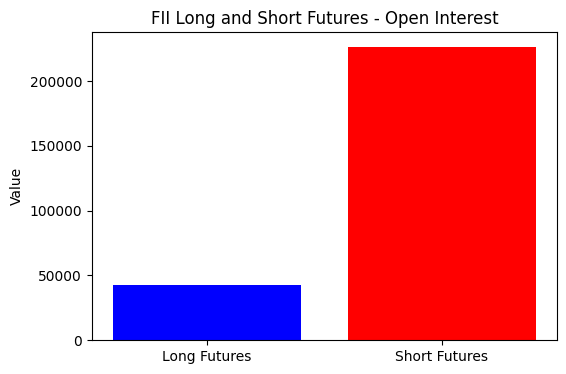

In [25]:
plot_futures_graph("FII", df_open_interest, TYPE["OPEN_INTEREST"])

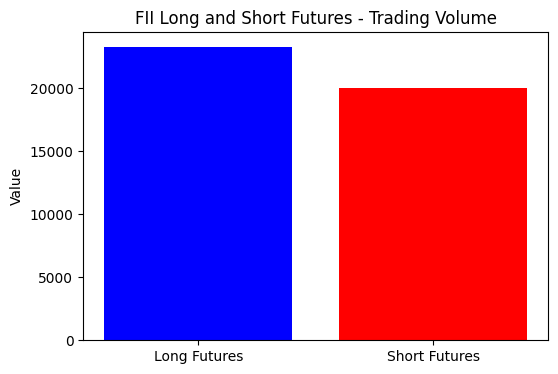

In [26]:
plot_futures_graph("FII", df_trading_volume, TYPE["TRADING_VOLUME"])

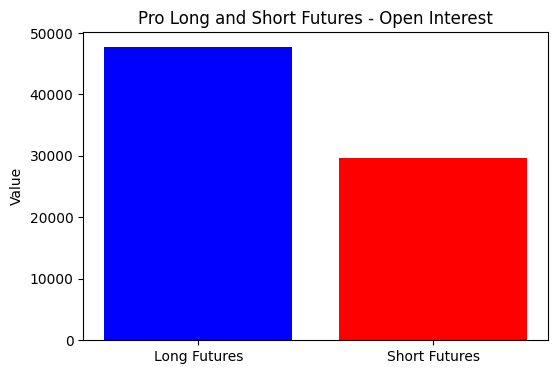

In [27]:
plot_futures_graph("Pro", df_open_interest, TYPE["OPEN_INTEREST"])

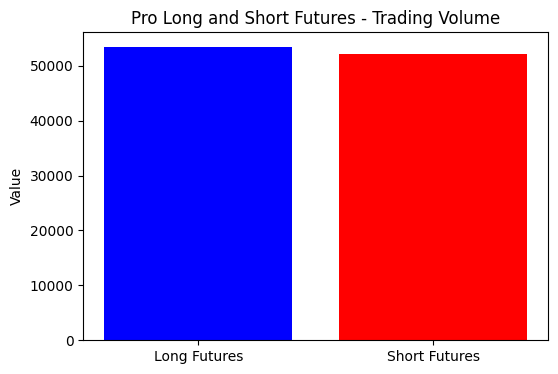

In [28]:
plot_futures_graph("Pro", df_trading_volume, TYPE["TRADING_VOLUME"])

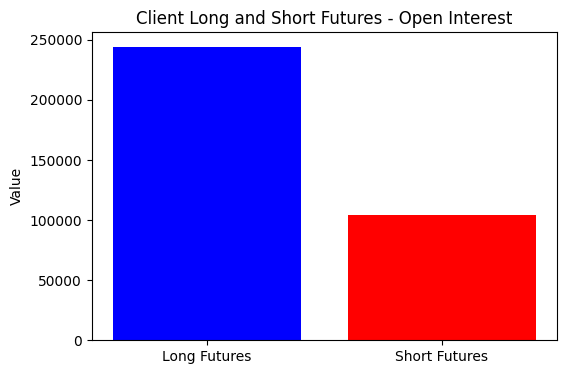

In [29]:
plot_futures_graph("Client", df_open_interest, TYPE["OPEN_INTEREST"])

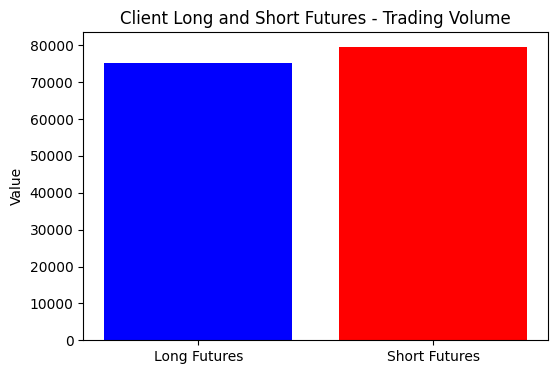

In [30]:
plot_futures_graph("Client", df_trading_volume, TYPE["TRADING_VOLUME"])

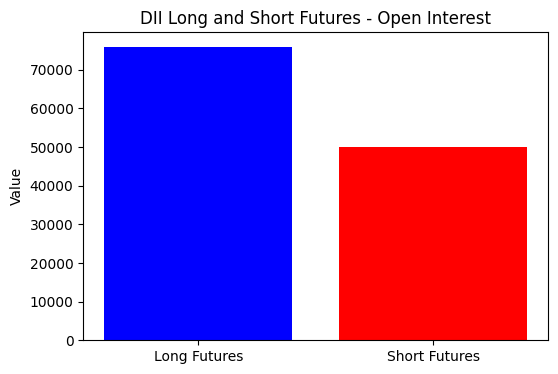

In [31]:
plot_futures_graph("DII", df_open_interest, TYPE["OPEN_INTEREST"])

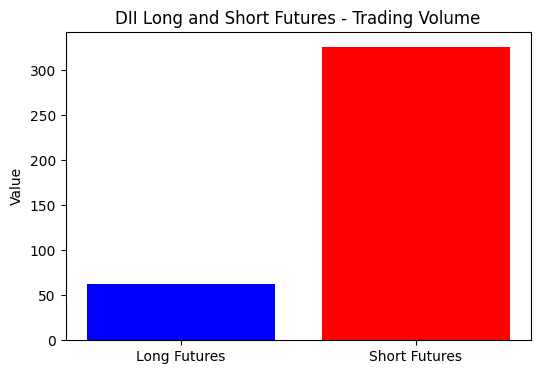

In [32]:
plot_futures_graph("DII", df_trading_volume, TYPE["TRADING_VOLUME"])

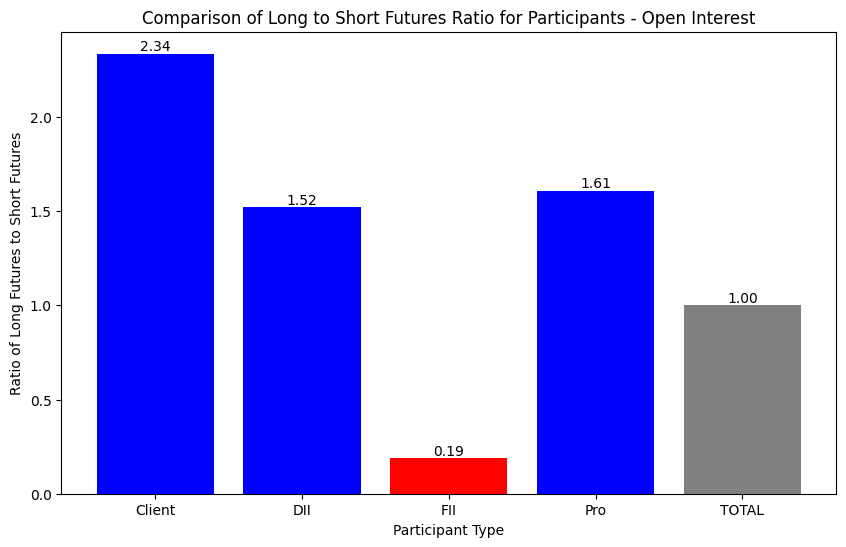

In [33]:
plot_fut_long_to_short_ratio(df_open_interest, TYPE["OPEN_INTEREST"])

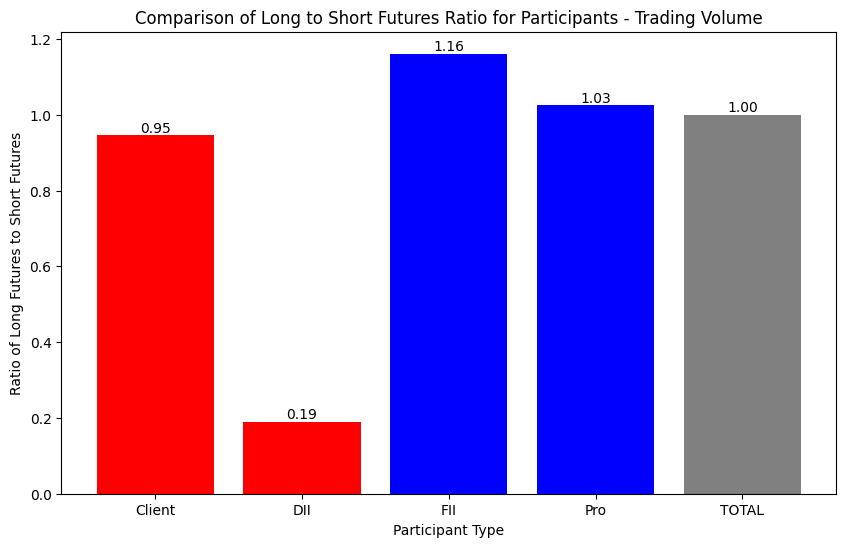

In [34]:
plot_fut_long_to_short_ratio(df_trading_volume, TYPE["TRADING_VOLUME"])

/Users/Z009TZW/Documents/my_files/trade_formula/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


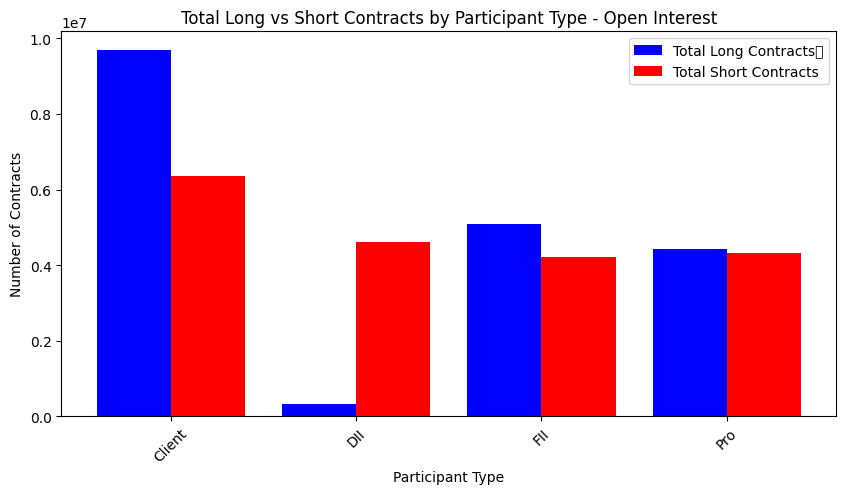

In [35]:
plot_total_contracts(df_open_interest, TYPE["OPEN_INTEREST"])

/Users/Z009TZW/Documents/my_files/trade_formula/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


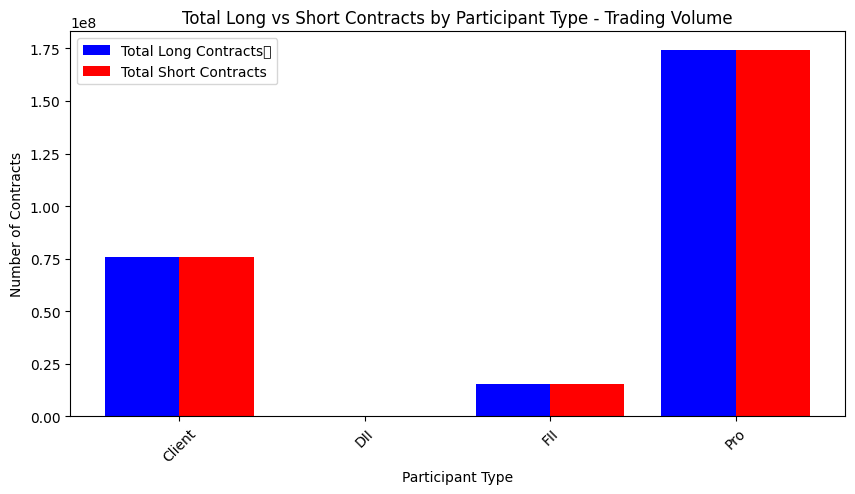

In [36]:
plot_total_contracts(df_trading_volume, TYPE["TRADING_VOLUME"])

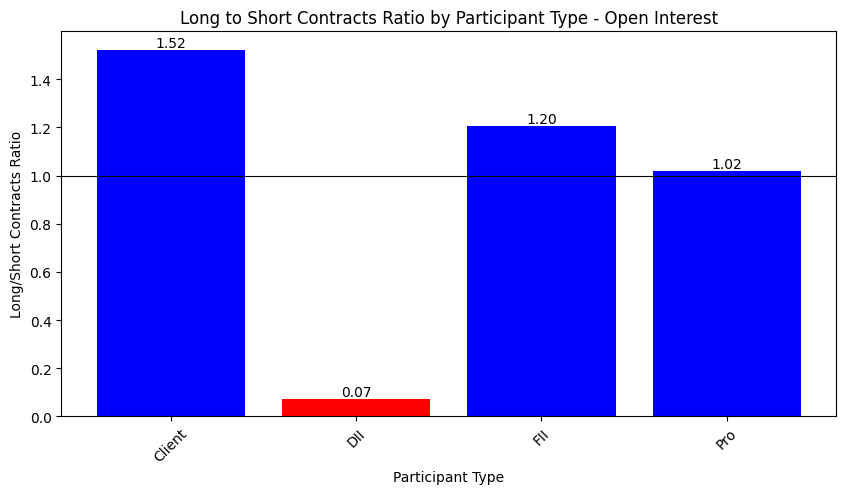

In [37]:
plot_total_long_short_contract_ratio(df_open_interest, TYPE["OPEN_INTEREST"])

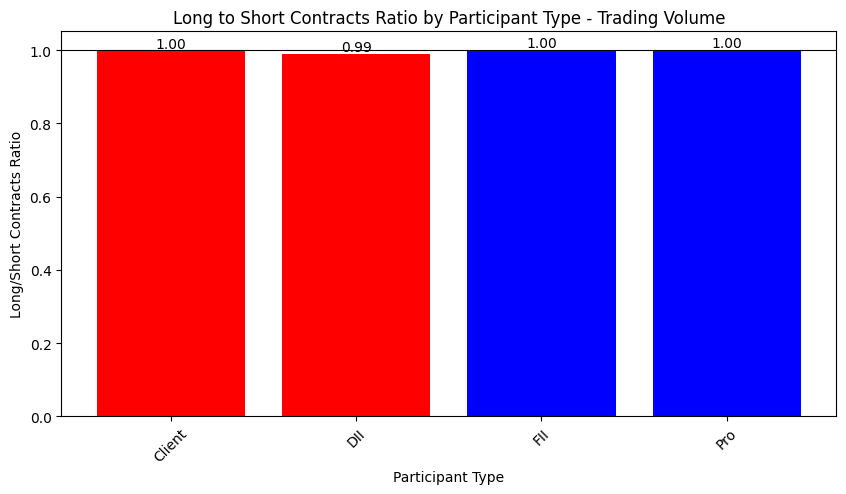

In [38]:
plot_total_long_short_contract_ratio(df_trading_volume, TYPE["TRADING_VOLUME"])

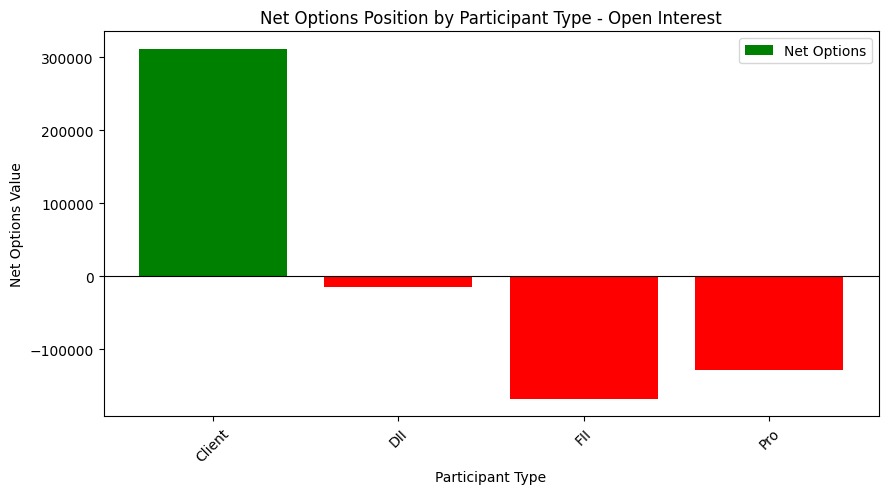

In [39]:
plot_net_options(df_open_interest, TYPE["OPEN_INTEREST"])

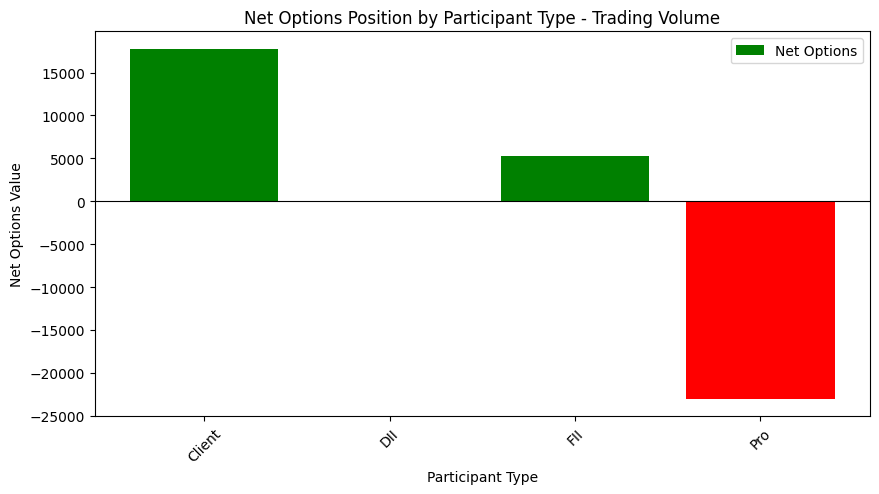

In [40]:
plot_net_options(df_trading_volume, TYPE["TRADING_VOLUME"])

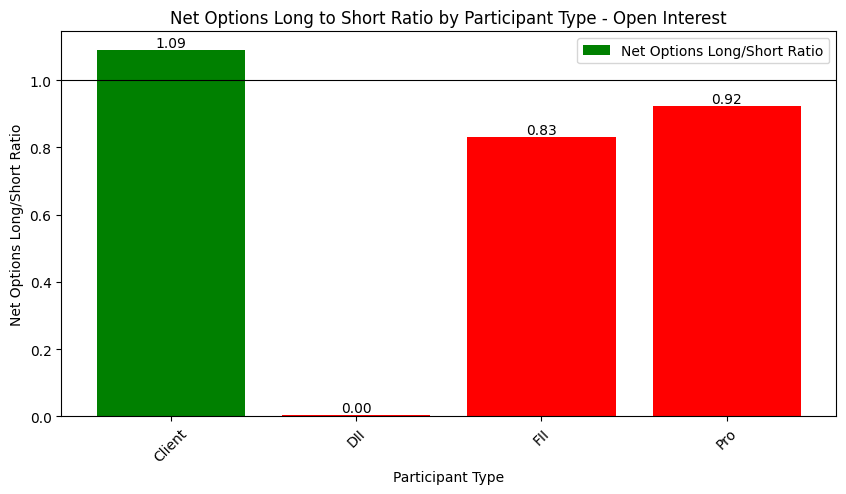

In [41]:
plot_net_options_long_to_short_ratio(df_open_interest, TYPE["OPEN_INTEREST"])

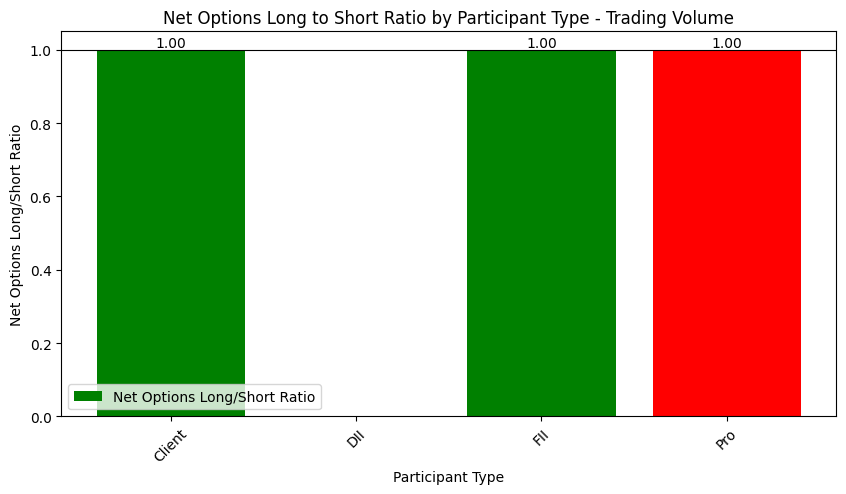

In [42]:
plot_net_options_long_to_short_ratio(df_trading_volume, TYPE["TRADING_VOLUME"])